[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-22-2451c2d4e96c>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm')


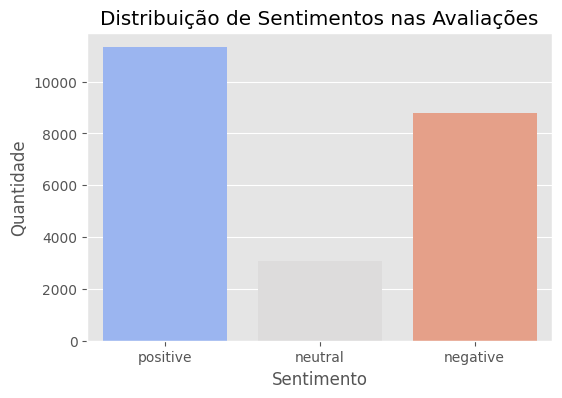

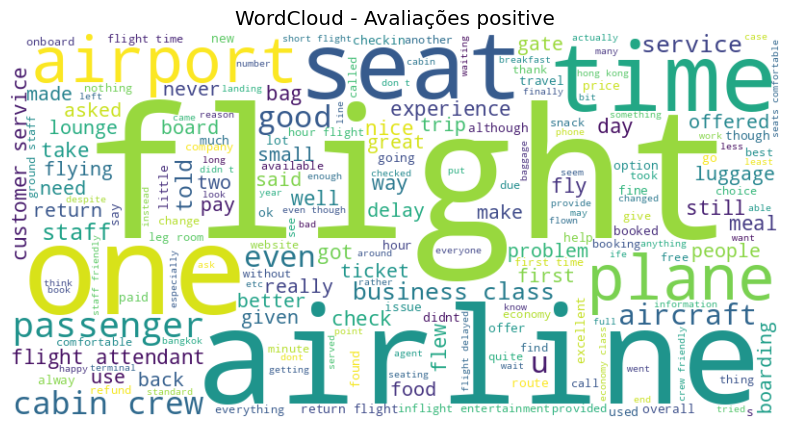

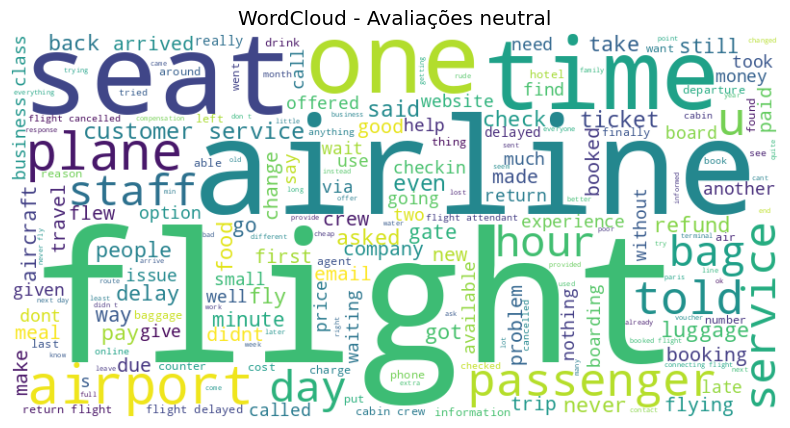

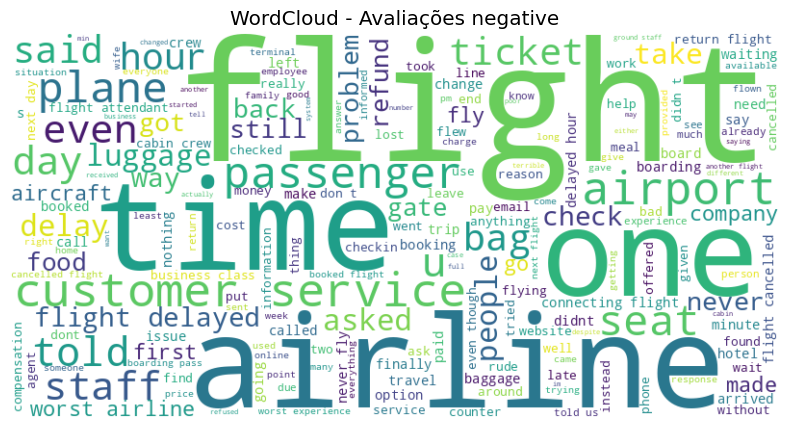


Tópico 1:
flight (0.33)
airline (0.15)
time (0.15)
service (0.15)
us (0.13)
staff (0.12)
good (0.12)
hours (0.11)
would (0.11)
airport (0.11)

Tópico 2:
good (0.27)
crew (0.22)
cabin (0.20)
food (0.17)
friendly (0.16)
class (0.14)
comfortable (0.14)
seats (0.14)
seat (0.13)
aircraft (0.12)

Tópico 3:
flight (0.39)
delayed (0.22)
hours (0.20)
delay (0.15)
hour (0.14)
time (0.13)
plane (0.13)
minutes (0.12)
us (0.11)
late (0.11)

Tópico 4:
luggage (0.36)
bag (0.23)
check (0.20)
plane (0.17)
boarding (0.16)
baggage (0.14)
bags (0.14)
us (0.13)
gate (0.12)
pay (0.11)

Tópico 5:
class (0.39)
business (0.36)
seat (0.27)
economy (0.18)
seats (0.18)
us (0.11)
told (0.09)
lounge (0.09)
flight (0.09)
premium (0.09)


<ipython-input-22-2451c2d4e96c>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Type Of Traveller', y='Overall_Rating', estimator='mean', palette='viridis')


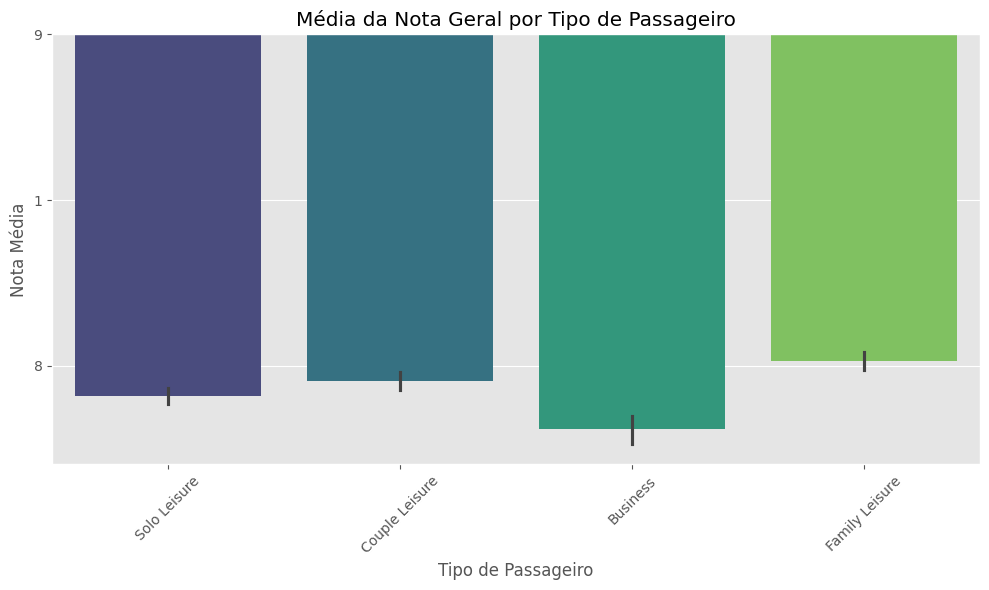

<ipython-input-22-2451c2d4e96c>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Airline Name'].isin(top_airlines)], x='Airline Name', y='Overall_Rating', palette='Set2')


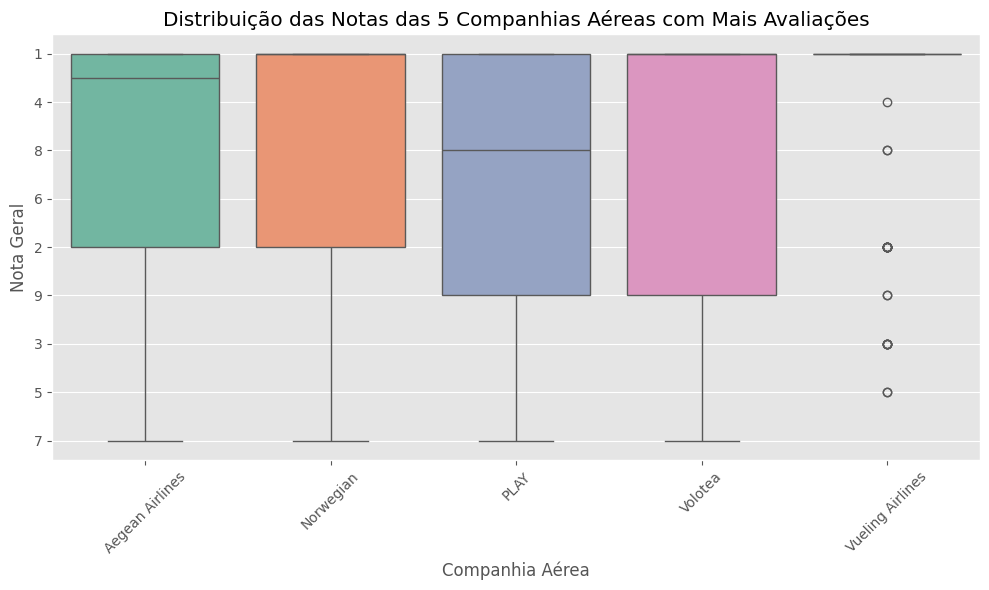

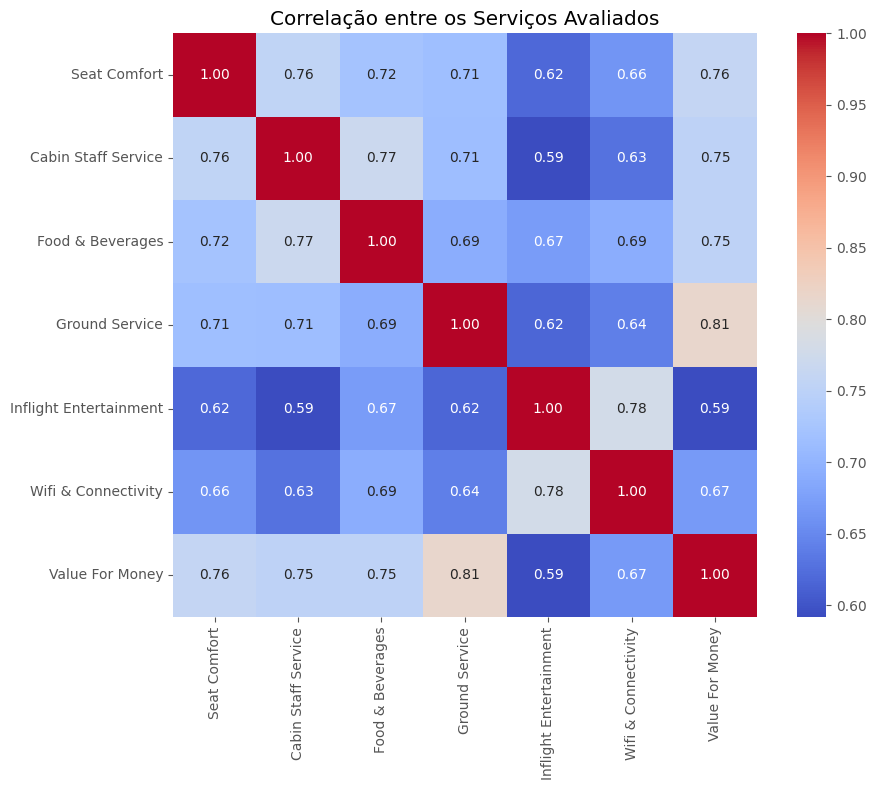

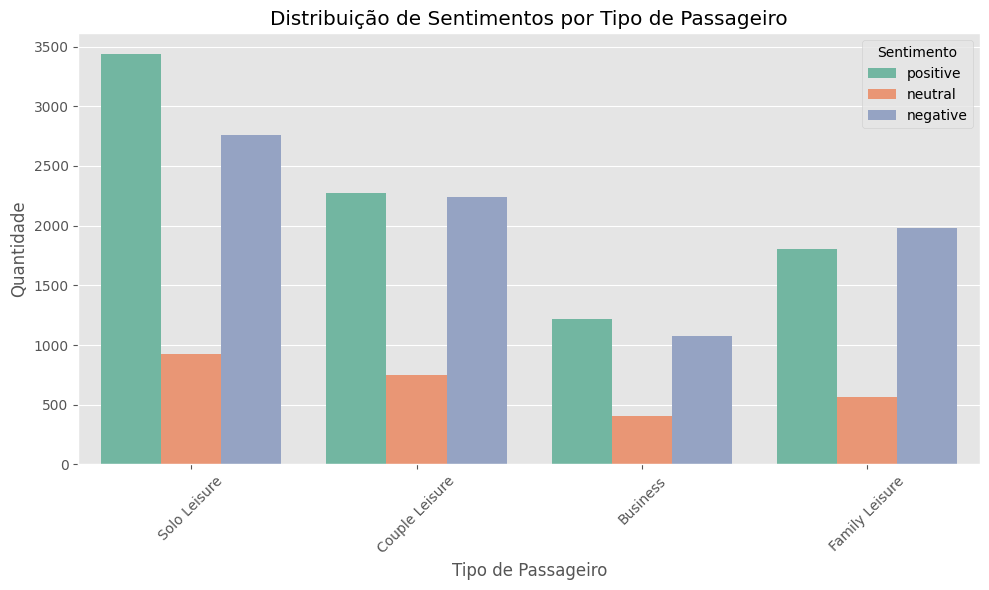

<ipython-input-22-2451c2d4e96c>:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words, palette='Greens_r')


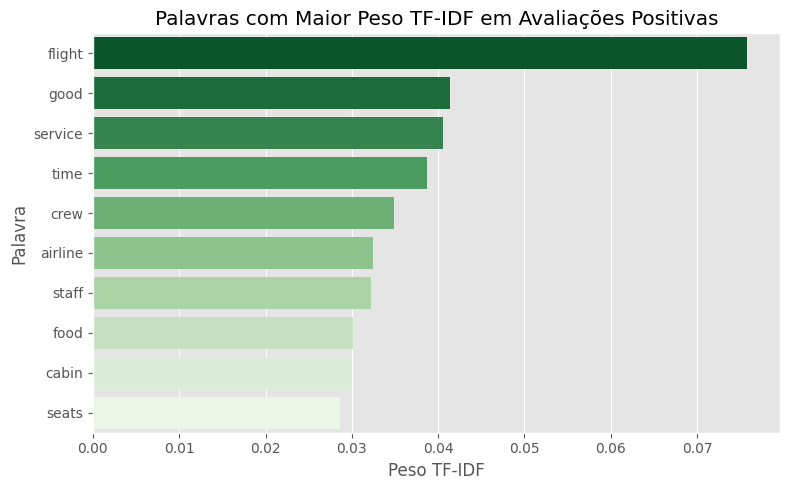


🧹 Iniciando a limpeza e pré-processamento dos dados...
✅ Limpeza de dados concluída!

📊 Análise 1: Melhores Experiências por Tipo de Assento


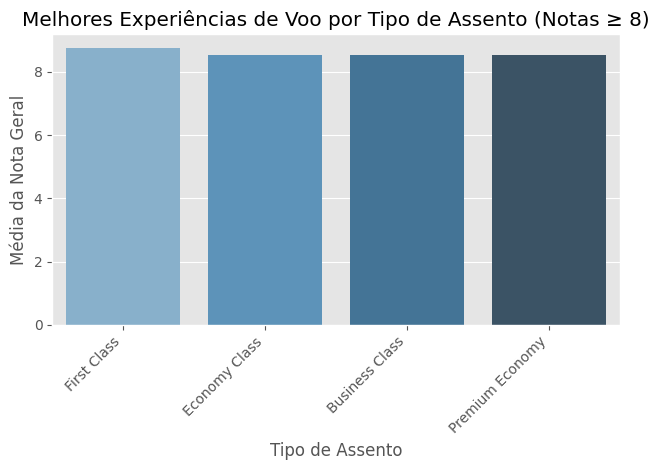


📌 Exemplos de reviews excelentes por tipo de assento:

✈️ Tipo de Assento: Business Class — Nota: 8.0
   Review: Ljubljana to Vienna. After a fast boarding procedure the plane took off in time. The seat was quite comfortable although the cabin looked a bit nagged. Despite the fact that this was a regional flight, Adria Airways offered a Wifi service with good connection, an IFE system and free chat function am...

✈️ Tipo de Assento: Economy Class — Nota: 9.0
   Review: Athens Airport was extremely busy when I arrived. Proceeded to the Aegean Airlines check-in area which was manned by helpful staff and carried out self check-in. Met by polite staff at bag drop. Queues were starting to form at some counters, the one next to me was being held up by some irritating pa...

✈️ Tipo de Assento: Premium Economy — Nota: 8.0
   Review: I travel a lot for my job and have lived in several different countries and so regularly use many different airlines. Although Aer Lingus are not always perfect

<ipython-input-22-2451c2d4e96c>:272: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


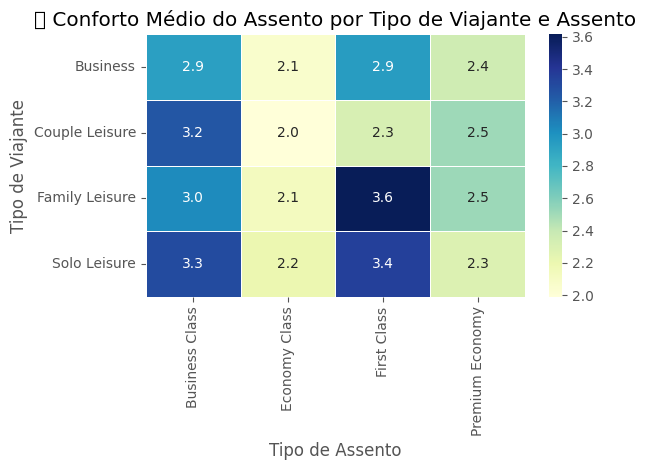


📊 Análise 3: Avaliação Média por Categoria de Serviço


<ipython-input-22-2451c2d4e96c>:324: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


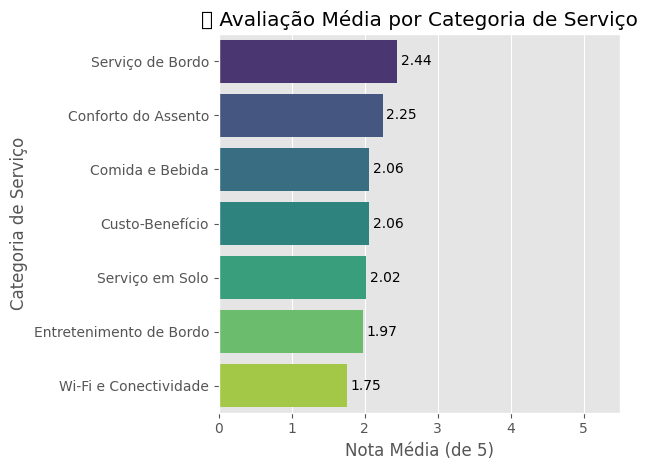

In [22]:
# Instalar bibliotecas
!pip install -q wordcloud nltk seaborn scikit-learn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

# Baixar recursos
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Carregar dados
df = pd.read_csv('/content/Airline_review.csv')

# Limpeza do texto
stop_words = set(stopwords.words('english'))
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['Review'].apply(clean_text)

# Análise de sentimentos
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.3 else 'negative' if x < -0.3 else 'neutral'
)

# Plot: Distribuição de sentimentos
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title("Distribuição de Sentimentos nas Avaliações")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.show()

# Wordclouds por sentimento
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['sentiment_label'] == sentiment]['clean_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud - Avaliações {sentiment}")
    plt.axis('off')
    plt.show()

# TF-IDF + tópicos principais
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_review'])

svd = TruncatedSVD(n_components=5)
svd.fit(X)

terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTópico {i+1}:")
    for term, weight in sorted_terms:
        print(f"{term} ({weight:.2f})")




#Gráficos adicionais



# Gráfico 1: Média da nota geral por tipo de passageiro
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Type Of Traveller', y='Overall_Rating', estimator='mean', palette='viridis')
plt.title("Média da Nota Geral por Tipo de Passageiro")
plt.xlabel("Tipo de Passageiro")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Boxplot das notas por companhia aérea mais comentadas
top_airlines = df['Airline Name'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Airline Name'].isin(top_airlines)], x='Airline Name', y='Overall_Rating', palette='Set2')
plt.title("Distribuição das Notas das 5 Companhias Aéreas com Mais Avaliações")
plt.xlabel("Companhia Aérea")
plt.ylabel("Nota Geral")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Mapa de calor das correlações entre serviços
servico_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
corr = df[servico_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlação entre os Serviços Avaliados")
plt.tight_layout()
plt.show()



# Análise de sentimentos com VADER
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.3 else 'negative' if x < -0.3 else 'neutral'
)


#Distribuição de sentimentos por tipo de passageiro
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type Of Traveller', hue='sentiment_label', palette='Set2')
plt.title("Distribuição de Sentimentos por Tipo de Passageiro")
plt.xlabel("Tipo de Passageiro")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title='Sentimento')
plt.tight_layout()
plt.show()



#TF-IDF — Tópicos mais relevantes por sentimento
def top_tfidf_words(text_series, label, top_n=10):
    subset = df[df['sentiment_label'] == label]
    vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(subset['clean_review'])
    mean_tfidf = tfidf_matrix.mean(axis=0).A1
    top_indices = mean_tfidf.argsort()[-top_n:][::-1]
    top_words = [(vectorizer.get_feature_names_out()[i], mean_tfidf[i]) for i in top_indices]
    return top_words

# Gráfico para sentimentos positivos
top_words_pos = top_tfidf_words(df['clean_review'], 'positive')

plt.figure(figsize=(8, 5))
words, scores = zip(*top_words_pos)
sns.barplot(x=scores, y=words, palette='Greens_r')
plt.title("Palavras com Maior Peso TF-IDF em Avaliações Positivas")
plt.xlabel("Peso TF-IDF")
plt.ylabel("Palavra")
plt.tight_layout()
plt.show()




df.rename(columns={
        'Overall Rating': 'Overall_Rating',
        'Seat Type': 'Seat_Type',
        'Seat Comfort': 'Seat_Comfort',
        'Type Of Traveller': 'Type_of_Traveller',
        'Cabin Staff Service': 'Cabin_Staff_Service',
        'Food & Beverages': 'Food_Beverages',
        'Ground Service': 'Ground_Service',
        'Inflight Entertainment': 'Inflight_Entertainment',
        'Wifi & Connectivity': 'Wifi_Connectivity',
        'Value For Money': 'Value_for_Money'
    }, inplace=True)
# ==============================================================================
# 3. LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================================================
if not df.empty:
    print("\n🧹 Iniciando a limpeza e pré-processamento dos dados...")
    # Converter colunas numéricas, tratando erros que possam surgir
    numeric_cols = [
        'Overall_Rating', 'Seat_Comfort', 'Cabin_Staff_Service', 'Food_Beverages',
        'Ground_Service', 'Inflight_Entertainment', 'Wifi_Connectivity', 'Value_for_Money'
    ]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Limpar colunas de texto
    text_cols = ['Seat_Type', 'Type_of_Traveller', 'Review']
    for col in text_cols:
        df[col] = df[col].astype(str).str.strip()

    # Remover linhas onde colunas essenciais para a análise são nulas
    # Adicionamos todas as colunas de avaliação de serviço à lista de essenciais
    essential_cols = [
        'Overall_Rating', 'Seat_Type', 'Seat_Comfort', 'Type_of_Traveller', 'Review',
        'Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service', 'Inflight_Entertainment',
        'Wifi_Connectivity', 'Value_for_Money'
    ]
    df.dropna(subset=essential_cols, inplace=True)

    # Remover valores 'nan' (como string) que possam ter sobrado nas colunas de texto
    df = df[df['Seat_Type'].str.lower() != 'nan']
    df = df[df['Type_of_Traveller'].str.lower() != 'nan']

    print("✅ Limpeza de dados concluída!")
else:
    print("❌ DataFrame vazio. As análises não podem ser executadas.")


# ==============================================================================
# 4. ANÁLISE 1: MELHORES EXPERIÊNCIAS POR TIPO DE ASSENTO
# ==============================================================================
if not df.empty:
    print("\n📊 Análise 1: Melhores Experiências por Tipo de Assento")
    # Filtrar apenas as avaliações consideradas excelentes (nota >= 8 de 10)
    df_best = df[df['Overall_Rating'] >= 8].copy()

    if not df_best.empty and df_best['Seat_Type'].nunique() > 0:
        # Calcular a média da nota geral para cada tipo de assento
        seat_rating_mean = (
            df_best.groupby('Seat_Type')['Overall_Rating']
            .mean()
            .sort_values(ascending=False)
            .reset_index()
        )

        # Gráfico de barras: Média das melhores notas por tipo de assento
        plt.figure()
        sns.barplot(data=seat_rating_mean, x='Seat_Type', y='Overall_Rating', palette='Blues_d', hue='Seat_Type', dodge=False)
        plt.title("Melhores Experiências de Voo por Tipo de Assento (Notas ≥ 8)")
        plt.xlabel("Tipo de Assento")
        plt.ylabel("Média da Nota Geral")
        plt.xticks(rotation=45, ha='right')
        plt.legend([],[], frameon=False) # Ocultar legenda duplicada
        plt.tight_layout()
        plt.show()

        # Mostrar exemplos de avaliações excelentes para dar contexto qualitativo
        print("\n📌 Exemplos de reviews excelentes por tipo de assento:\n")
        # Usamos drop_duplicates para garantir que não pegamos o mesmo grupo mais de uma vez
        amostras = df_best.drop_duplicates(subset=['Seat_Type']).reset_index(drop=True)
        for _, row in amostras.iterrows():
            print(f"✈️ Tipo de Assento: {row['Seat_Type']} — Nota: {row['Overall_Rating']}")
            print(f"   Review: {row['Review'][:300]}...\n")

    else:
        print("❌ Não há dados suficientes com notas ≥ 8 para gerar esta análise.")


# ==============================================================================
# 5. ANÁLISE 2: CONFORTO DO ASSENTO (TIPO DE VIAJANTE vs TIPO DE ASSENTO)
# ==============================================================================
if not df.empty:
    print("\n📊 Análise 2: Conforto do Assento (Heatmap)")
    # Criar uma tabela dinâmica (pivot table) para cruzar os dados
    try:
        pivot = df.pivot_table(
            index='Type_of_Traveller',
            columns='Seat_Type',
            values='Seat_Comfort',
            aggfunc='mean'
        )

        # Gráfico de calor (heatmap) para visualizar o conforto médio
        plt.figure()
        sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=.5, fmt=".1f")
        plt.title('💺 Conforto Médio do Assento por Tipo de Viajante e Assento')
        plt.xlabel('Tipo de Assento')
        plt.ylabel('Tipo de Viajante')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Não foi possível gerar o heatmap. Causa provável: não há dados suficientes após o cruzamento. Erro: {e}")

# ==============================================================================
# 6. ANÁLISE 3: AVALIAÇÃO MÉDIA DOS SERVIÇOS
# ==============================================================================
if not df.empty:
    print("\n📊 Análise 3: Avaliação Média por Categoria de Serviço")

    # Lista de colunas de serviço para analisar
    service_cols = [
        'Seat_Comfort', 'Cabin_Staff_Service', 'Food_Beverages',
        'Ground_Service', 'Inflight_Entertainment', 'Wifi_Connectivity',
        'Value_for_Money'
    ]

    # Calcular a média de cada serviço e ordenar para melhor visualização
    service_means = df[service_cols].mean().sort_values(ascending=False).reset_index()
    service_means.columns = ['Category', 'Average_Rating']

    # Traduzir os nomes das categorias para o gráfico
    category_translation = {
        'Cabin_Staff_Service': 'Serviço de Bordo',
        'Value_for_Money': 'Custo-Benefício',
        'Seat_Comfort': 'Conforto do Assento',
        'Food_Beverages': 'Comida e Bebida',
        'Inflight_Entertainment': 'Entretenimento de Bordo',
        'Ground_Service': 'Serviço em Solo',
        'Wifi_Connectivity': 'Wi-Fi e Conectividade'
    }
    service_means['Category'] = service_means['Category'].replace(category_translation)

    if not service_means.empty:
        # Gráfico de barras para visualizar as médias
        plt.figure()
        ax = sns.barplot(data=service_means, x='Average_Rating', y='Category', palette='viridis', hue='Category', dodge=False)
        plt.title('⭐ Avaliação Média por Categoria de Serviço')
        plt.xlabel('Nota Média (de 5)')
        plt.ylabel('Categoria de Serviço')
        plt.xlim(0, 5.5)  # A escala de notas vai de 1 a 5
        plt.legend([],[], frameon=False) # Ocultar legenda duplicada

        # Adicionar os valores exatos no final de cada barra
        for p in ax.patches:
            width = p.get_width()
            plt.text(width + 0.05, p.get_y() + p.get_height() / 2.,
                     f'{width:.2f}',
                     va='center')

        plt.tight_layout()
        plt.show()
    else:
        print("❌ Não há dados suficientes para gerar a análise de serviços.")


